<a href="https://colab.research.google.com/github/umeshrawat/MachineLearning/blob/master/Unsupervised_Classification/SocialClusters/src/SocialClusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Open the code repo

!git clone https://github.com/umeshrawat/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Enumerating objects: 350, done.
remote: Counting objects: 100% (350/350), done.
remote: Compressing objects: 100% (328/328), done.
remote: Total 350 (delta 57), reused 232 (delta 9), pack-reused 0
Receiving objects: 100% (350/350), 14.26 MiB | 6.46 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [2]:
root_folder_path = '/content/MachineLearning/Unsupervised_Classification/SocialClusters/Dataset/facebook_combined.txt'

In [ ]:
!pip install python-igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 10.3 MB/s eta 0:00:00


In [3]:
import networkx as nx

nx_graph = nx.read_edgelist(root_folder_path, create_using = nx.Graph(), nodetype = int)

In [4]:
import pandas as pd

print(nx_graph)
# Calculate degree centrality
degree_centrality = nx.degree_centrality(nx_graph)
#print(type(degree_centrality))
degreeDataFrame = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
degreeDataFrame_sorted = degreeDataFrame.sort_values('Degree Centrality', ascending=False)
degreeDataFrame_sorted.reset_index(drop=True, inplace=True)
print(degreeDataFrame_sorted)

Graph with 4039 nodes and 88234 edges
      Node  Degree Centrality
0      107           0.258791
1     1684           0.196137
2     1912           0.186974
3     3437           0.135463
4        0           0.085934
5     2543           0.072808
6     2347           0.072065
7     1888           0.062902
8     1800           0.060674
9     1663           0.058197
10    2266           0.057949
11    1352           0.057949
12     483           0.057207
13     348           0.056711
14    1730           0.055968
15    1985           0.055473
16    1941           0.055225
17    2233           0.054978
18    2142           0.054730
19    1431           0.054482
20    1199           0.053739
21    1584           0.052254
22    2206           0.052006
23    1768           0.051758
24    2611           0.051263
25    2229           0.051263
26    2410           0.051263
27    1589           0.050768
28    2218           0.050768
29    2047           0.050768
30    1086           0.050768
31

Above data Frame shows that node 107 has 1045 connections, node 1684 has 791 connections.
and at the minimum, indices 3964 through 4038 have 1 connection with other node.


In [5]:
#Calculate Eigen Vector Centrality

# Calculate eigenvector centrality
eigenVectorcentrality = nx.eigenvector_centrality(nx_graph)

eigenVectorDataFrame = pd.DataFrame(eigenVectorcentrality.items(), columns=['Node', 'Eigen Vector Centrality'])
print(eigenVectorDataFrame)

      Node  Eigen Vector Centrality
0        0             3.391796e-05
1        1             6.045346e-07
2        2             2.233461e-07
3        3             6.635648e-07
4        4             2.236416e-07
5        5             1.183322e-06
6        6             2.170904e-07
7        7             2.568510e-05
8        8             2.197375e-07
9        9             2.214117e-06
10      10             7.708567e-07
11      11             2.103123e-07
12      12             2.103123e-07
13      13             1.103791e-06
14      14             2.305568e-07
15      15             2.103123e-07
16      16             2.616514e-07
17      17             2.277417e-07
18      18             2.103123e-07
19      19             2.314909e-07
20      20             2.303888e-07
21      21             2.596576e-05
22      22             1.036542e-06
23      23             2.327856e-07
24      24             2.487564e-07
25      25             2.092048e-06
26      26             2.333

In [6]:
#merge the 2 data frames
socialClusterDataFrame = pd.merge(degreeDataFrame_sorted, eigenVectorDataFrame,on = 'Node')
socialClusterDataFrame.describe()

,Node,Degree Centrality,Eigen Vector Centrality
count,4039.000000,4039.000000,4.039000e+03
mean,2019.000000,0.010820,3.864341e-03
std,1166.103197,0.012982,1.525485e-02
min,0.000000,0.000248,6.385265e-14
25%,1009.500000,0.002724,5.388575e-08
50%,2019.000000,0.006191,8.885652e-07
75%,3028.500000,0.014116,3.266349e-05
max,4038.000000,0.258791,9.540696e-02


In [7]:
print(socialClusterDataFrame)

      Node  Degree Centrality  Eigen Vector Centrality
0      107           0.258791             2.606940e-04
1     1684           0.196137             7.164260e-06
2     1912           0.186974             9.540696e-02
3     3437           0.135463             9.531613e-08
4        0           0.085934             3.391796e-05
5     2543           0.072808             7.287131e-02
6     2347           0.072065             8.032160e-02
7     1888           0.062902             1.060441e-04
8     1800           0.060674             1.019310e-04
9     1663           0.058197             1.285378e-04
10    2266           0.057949             8.698328e-02
11    1352           0.057949             1.270982e-04
12     483           0.057207             1.385700e-05
13     348           0.056711             1.458780e-05
14    1730           0.055968             9.479058e-05
15    1985           0.055473             8.273781e-02
16    1941           0.055225             5.168118e-02
17    2233

The above Dataframe shows that the Eigen vector centrality (Influential connections or Well-connected nodes) is low for the top 2 nodes with "many" neighbors (high degree centrality).
Node index 2, 3 have large number of neighbors and influential neighbors.

In [9]:
# Closeness Centrality
#Closeness Centrality helps us to fine out the "K" - central nodes for a cluster. These nodes help to reach out to all other nodes in the fewest steps.
closenesscentrality = nx.closeness_centrality(nx_graph)
closenessDataFrame = pd.DataFrame(closenesscentrality.items(), columns=['Node', 'Closeness Centrality'])
#closenessDataFrame
socialClusterDataFrame = pd.merge(socialClusterDataFrame, closenessDataFrame,on = 'Node')
socialClusterDataFrame.describe()
#Nodes with high closeness centrality mean they are relatively close to all other nodes in the graph.
#Formula = Reciprocal of sum of shortest paths between a node and all other nodes in the graph.

,Node,Degree Centrality,Eigen Vector Centrality,Closeness Centrality
count,4039.000000,4039.000000,4.039000e+03,4039.000000
mean,2019.000000,0.010820,3.864341e-03,0.276168
std,1166.103197,0.012982,1.525485e-02,0.036124
min,0.000000,0.000248,6.385265e-14,0.178255
25%,1009.500000,0.002724,5.388575e-08,0.260348
50%,2019.000000,0.006191,8.885652e-07,0.282457
75%,3028.500000,0.014116,3.266349e-05,0.315001
max,4038.000000,0.258791,9.540696e-02,0.459699


In [10]:
print(socialClusterDataFrame)

      Node  Degree Centrality  Eigen Vector Centrality  Closeness Centrality
0      107           0.258791             2.606940e-04              0.459699
1     1684           0.196137             7.164260e-06              0.393606
2     1912           0.186974             9.540696e-02              0.350947
3     3437           0.135463             9.531613e-08              0.314413
4        0           0.085934             3.391796e-05              0.353343
5     2543           0.072808             7.287131e-02              0.291300
6     2347           0.072065             8.032160e-02              0.283408
7     1888           0.062902             1.060441e-04              0.321292
8     1800           0.060674             1.019310e-04              0.321599
9     1663           0.058197             1.285378e-04              0.339185
10    2266           0.057949             8.698328e-02              0.281708
11    1352           0.057949             1.270982e-04              0.339157

From above, node 1912, 3437 have a high Centrality measures untill now.

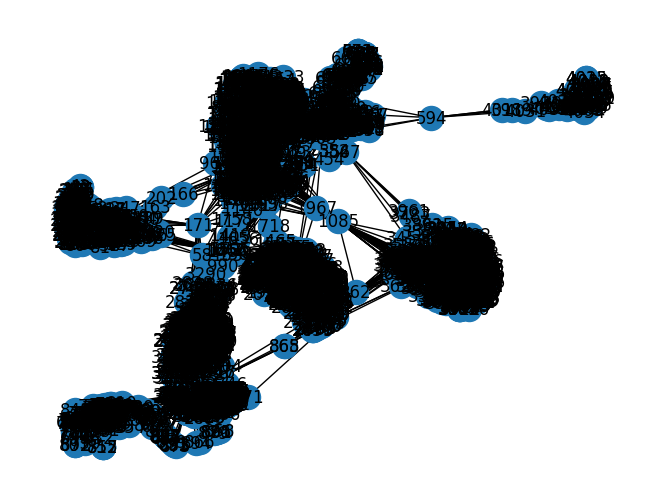

In [ ]:
import matplotlib.pyplot as plt
nx.draw(nx_graph, with_labels=True)
plt.show()